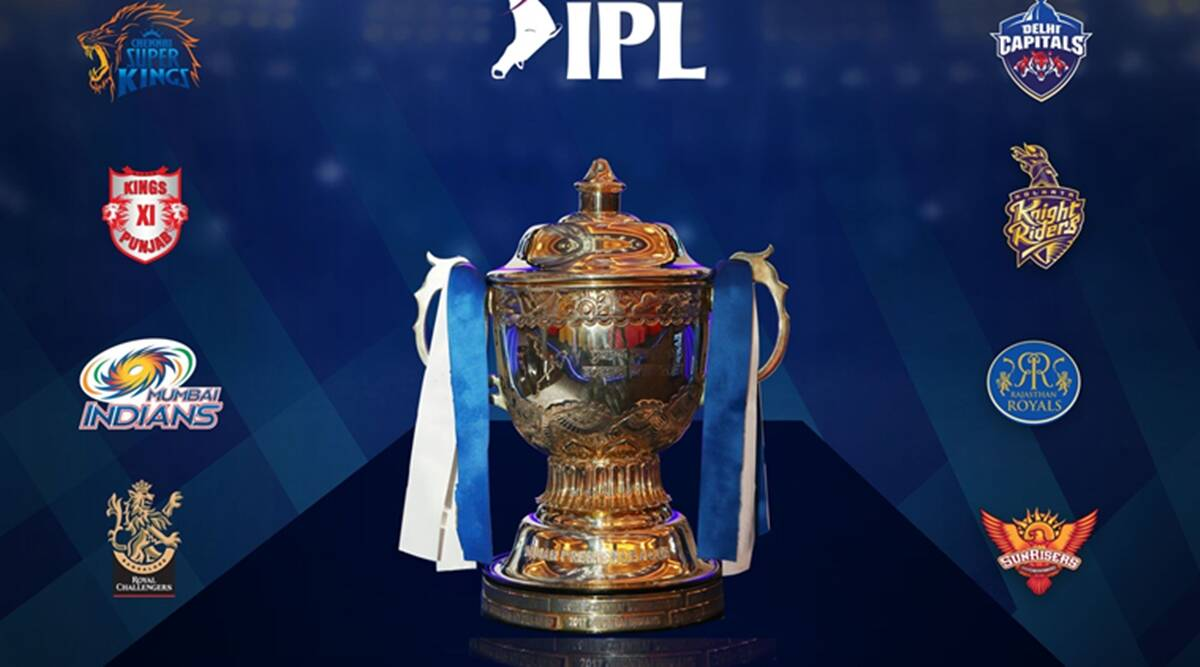

# Importing libraries

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns

# Data Reading

In [107]:
balls = pd.read_csv("Ball_by_Ball.csv")
balls.head(10)

,Match_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
0,335987,1,1,1,1,2,1,1,2,14,0,legbyes,1,,,
1,335987,1,1,2,1,2,2,2,1,14,0,,,,,
2,335987,1,1,3,1,2,2,2,1,14,0,wides,1,,,
3,335987,1,1,4,1,2,2,2,1,14,0,,,,,
4,335987,1,1,5,1,2,2,2,1,14,0,,,,,
5,335987,1,1,6,1,2,2,2,1,14,0,,,,,
6,335987,1,1,7,1,2,2,2,1,14,0,legbyes,1,,,
7,335987,1,2,1,1,2,2,2,1,15,0,,,,,
8,335987,1,2,2,1,2,2,2,1,15,4,,,,,
9,335987,1,2,3,1,2,2,2,1,15,4,,,,,


In [108]:
players = pd.read_csv("Player.csv")
players=players.drop(["Is_Umpire","Unnamed: 7"],axis=1)
players.head(10)

,Player_Id,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,1,SC Ganguly,8-Jul-72,Left_Hand,Right-arm medium,India
1,2,BB McCullum,27-Sep-81,Right_Hand,Right-arm medium,New Zealand
2,3,RT Ponting,19-Dec-74,Right_Hand,Right-arm medium,Australia
3,4,DJ Hussey,15-Jul-77,Right_Hand,Right-arm offbreak,Australia
4,5,Mohammad Hafeez,17-Oct-80,Right_Hand,Right-arm offbreak,Pakistan
5,6,R Dravid,11-Jan-73,Right_Hand,Right-arm offbreak,India
6,7,W Jaffer,16-Feb-78,Right_Hand,Right-arm offbreak,India
7,8,V Kohli,5-Nov-88,Right_Hand,Right-arm medium,India
8,9,JH Kallis,16-Oct-75,Right_Hand,Right-arm fast-medium,South Africa
9,10,CL White,18-Aug-83,Right_Hand,Legbreak googly,Australia


In [109]:
runs=balls[["Match_Id", "Over_Id", "Striker_Id", "Bowler_Id", "Batsman_Scored", "Extra_Runs"]]
runs.head(10)

,Match_Id,Over_Id,Striker_Id,Bowler_Id,Batsman_Scored,Extra_Runs
0,335987,1,1,14,0,1
1,335987,1,2,14,0,
2,335987,1,2,14,0,1
3,335987,1,2,14,0,
4,335987,1,2,14,0,
5,335987,1,2,14,0,
6,335987,1,2,14,0,1
7,335987,2,2,15,0,
8,335987,2,2,15,4,
9,335987,2,2,15,4,


In [110]:
runs.isnull().sum() #checking the null values

Match_Id          0
Over_Id           0
Striker_Id        0
Bowler_Id         0
Batsman_Scored    0
Extra_Runs        0
dtype: int64

In [111]:
runs.dtypes

Match_Id           int64
Over_Id            int64
Striker_Id         int64
Bowler_Id          int64
Batsman_Scored    object
Extra_Runs        object
dtype: object

converting object columns into numeric value

In [112]:
runs["Extra_Runs"] = pd.to_numeric(runs["Extra_Runs"], errors="coerce")
runs["Extra_Runs"] = runs["Extra_Runs"].fillna(0)

runs["Batsman_Scored"] = pd.to_numeric(runs["Batsman_Scored"], errors="coerce")
runs["Batsman_Scored"] = runs["Batsman_Scored"].fillna(0)

runs.head(15)

C:\Users\Pranav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Pranav\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Pranav\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,Match_Id,Over_Id,Striker_Id,Bowler_Id,Batsman_Scored,Extra_Runs
0,335987,1,1,14,0.0,1.0
1,335987,1,2,14,0.0,0.0
2,335987,1,2,14,0.0,1.0
3,335987,1,2,14,0.0,0.0
4,335987,1,2,14,0.0,0.0
5,335987,1,2,14,0.0,0.0
6,335987,1,2,14,0.0,1.0
7,335987,2,2,15,0.0,0.0
8,335987,2,2,15,4.0,0.0
9,335987,2,2,15,4.0,0.0


# Creating data frame for the batsman

Strike rate of a batsman can be calculated with the help of the number of runs scored by him and the number of balls he faced.

strike_rate = runs per 100 balls faced



In [113]:
A = []
B = []

for i in runs["Striker_Id"].unique(): # takes the value as 1 and 2 
    a = runs["Batsman_Scored"][runs["Striker_Id"] == i].sum()
    b = runs["Match_Id"][runs["Striker_Id"] == i].count()
    A.append(a)
    B.append(b)

Batsmen = pd.DataFrame({"Player_names": runs["Striker_Id"].unique()})


Batsmen["Runs"] = A
Batsmen["Balls_played"] = B


# Calculating strike rate using the formula (strike_rate = runs per 100 balls faced)

Batsmen["Strike_rate"] = (Batsmen["Runs"] * 100 / Batsmen["Balls_played"])
Batsmen["Strike_rate"].head()

0    101.734540
1    124.616172
2     70.542636
3    120.072661
4     76.190476
Name: Strike_rate, dtype: float64

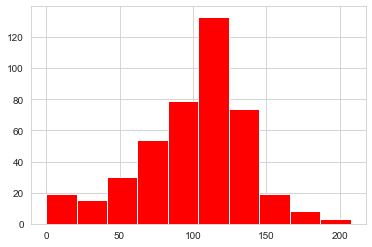

In [114]:
Batsmen["Strike_rate"].hist(color="red")

the players with lower strike rates need not to be considered as they bat at lesser period and mostly are bowlers

In [115]:
Batsmen = Batsmen[Batsmen["Strike_rate"] > 60]
Batsmen = Batsmen[Batsmen["Strike_rate"] < 150]

run rate: runs per over(or per 6 balls)

In [116]:
Batsmen = Batsmen[(Batsmen["Runs"]*6/Batsmen["Balls_played"]) > 6]
Batsmen.head()

,Player_names,Runs,Balls_played,Strike_rate
0,1,1349.0,1326,101.734540
1,2,2435.0,1954,124.616172
3,4,1322.0,1101,120.072661
5,6,2170.0,1918,113.138686
6,7,130.0,129,100.775194


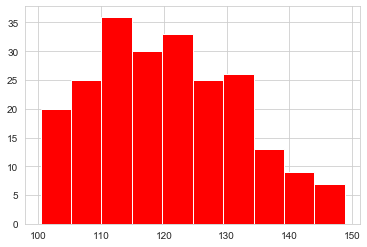

In [117]:
Batsmen["Strike_rate"].hist(color="red")

## Applying k means cluster on batsman data

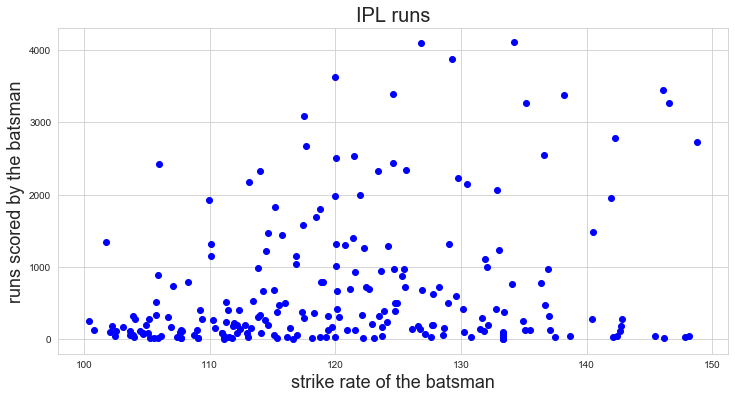

In [118]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
fig = plt.figure(figsize=(12,6))
plt.scatter(Batsmen['Strike_rate'],Batsmen['Runs'], color = 'blue')
plt.xlabel('strike rate of the batsman', fontsize = 18)
plt.ylabel('runs scored by the batsman', fontsize = 18)
plt.title('IPL runs', fontsize = 20)
plt.show()

The distribution of the Batsmen appears to be in largely five clusters:
under 500 runs - highest density of dots

500 - 1000 runs

1000 - 2000 runs

2000 - 3000 runs

above 3000 runs

## Applying clustering algorithm

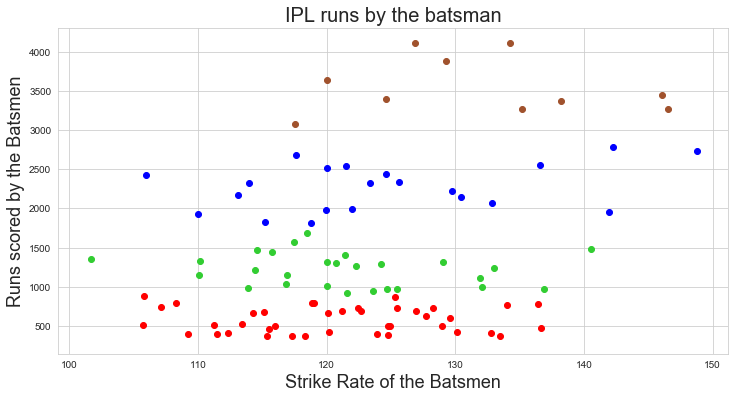

In [119]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(Batsmen[["Strike_rate", "Runs"]])
Batsmen["cluster"] = kmeans.labels_

fig = plt.figure(figsize=(12,6))

colors = ["blue", "sienna", "limegreen", "red", "black"]

for r in range(1,6):
    clustered_Batsmen = Batsmen[Batsmen["cluster"] == r]
    plt.scatter(clustered_Batsmen["Strike_rate"], clustered_Batsmen["Runs"], color=colors[r-1])

plt.xlabel("Strike Rate of the Batsmen", fontsize=18)
plt.ylabel("Runs scored by the Batsmen", fontsize=18)
plt.title("IPL runs by the batsman", fontsize=20)
plt.show()

### Merging the Player dataframe and Batsmen dataframe to show player names and cluster ids.

In [120]:
Batsmen = Batsmen.rename(columns={"Player_names":"Player_Id"})
Batsmen = Batsmen.sort_values(by="cluster")
Batsmen.head()

,Player_Id,Runs,Balls_played,Strike_rate,cluster
182,182,81.0,71,114.084507,0
240,241,203.0,159,127.672956,0
243,244,34.0,26,130.769231,0
244,245,34.0,23,147.826087,0
245,246,36.0,27,133.333333,0


In [121]:
Players_batsmen = players[["Player_Id", "Player_Name","Batting_Hand","DOB","Country"]]

#### Display the batting hand of the batsman

In [122]:
Batsmen = Batsmen[Batsmen.columns].merge(Players_batsmen, "left")
Batsmen

,Player_Id,Runs,Balls_played,Strike_rate,cluster,Player_Name,Batting_Hand,DOB,Country
0,182,81.0,71,114.084507,0,LA Carseldine,Left_Hand,17-Nov-75,Australia
1,241,203.0,159,127.672956,0,PD Collingwood,Right_Hand,26-May-76,England
2,244,34.0,26,130.769231,0,A Mithun,Right_Hand,25-Oct-89,India
3,245,34.0,23,147.826087,0,AP Dole,Right_Hand,9-Oct-87,India
4,246,36.0,27,133.333333,0,AN Ahmed,Right_Hand,5-Nov-88,India
...,...,...,...,...,...,...,...,...,...
219,372,379.0,284,133.450704,4,CJ Anderson,Left_Hand,13-Dec-90,New Zealand
220,374,379.0,323,117.337461,4,AR Patel,Left_Hand,20-Jan-94,India
221,310,473.0,346,136.705202,4,JP Faulkner,Right_Hand,29-Apr-90,Australia
222,97,886.0,837,105.854241,4,HH Gibbs,Right_Hand,23-Feb-74,South Africa


In [123]:
def plot_bar(df, feat_x, feat_y, normalize=True):
    """ Plot with vertical bars of the requested dataframe and features"""
    
    ct = pd.crosstab(df[feat_x], df[feat_y])
    if normalize == True:
        ct = ct.div(ct.sum(axis=1), axis=0)
    return ct.plot(kind='bar', stacked=True)

#### Data visualization of batting hand and cluster assigned to each player

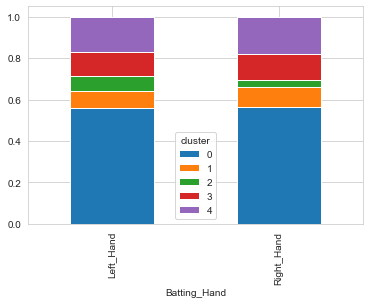

In [124]:
plot_bar(Batsmen, 'Batting_Hand', 'cluster')
plt.show()

## Dataframe for the bowlers 

Economy rate of a bowler can be calculated with the help of the number of runs conceded by him and the number of balls he bowled.

economy rate = total runs conceded/number of overs bowled

In [125]:
C = []
E = []

for j in runs['Bowler_Id'].unique():
    c = runs["Batsman_Scored"][runs["Bowler_Id"] == j].sum() + runs["Extra_Runs"][runs["Bowler_Id"] == j].sum()
    e = runs["Over_Id"][runs["Bowler_Id"] == j].count()/6

    C.append(c)
    E.append(e)
    
Bowlers = pd.DataFrame({"Bowler_names": runs["Bowler_Id"].unique()})

Bowlers["Runs"] = C
Bowlers["Over_count"] = E

# Calculating economy rate using the formula (total runs conceded/number of overs bowled)

Bowlers["Econ_Rate"] = (Bowlers["Runs"] / Bowlers["Over_count"]).round(2)

Bowlers.head()    


,Bowler_names,Runs,Over_count,Econ_Rate
0,14,3135.0,421.500000,7.44
1,15,2511.0,338.333333,7.42
2,13,41.0,4.166667,9.84
3,9,2316.0,299.833333,7.72
4,16,82.0,9.166667,8.95


#### Checking distribution of the bowlers

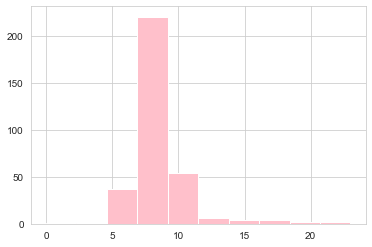

In [126]:
Bowlers["Econ_Rate"].hist(color="pink")

Since we have to assess bowlers, the players with economy rates above 10.5 are not likely to be good candidates for bowling as they are most likely batsmen.

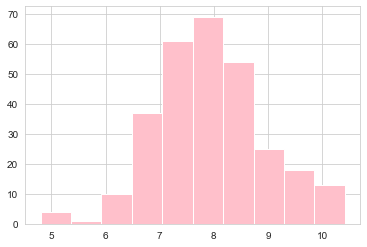

In [127]:
Bowlers = Bowlers[(Bowlers['Econ_Rate']>4) & (Bowlers['Econ_Rate']<10.5)]
Bowlers['Econ_Rate'].hist(color='pink')

 ### Applying K Means Clustering on Bowlers Data¶

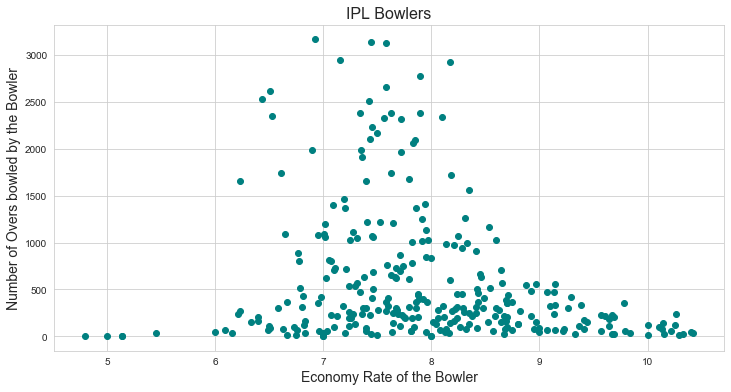

In [128]:
sns.set_style("whitegrid")

fig = plt.figure(figsize=(12,6))
plt.scatter(Bowlers["Econ_Rate"], Bowlers["Runs"], color="teal")
plt.xlabel("Economy Rate of the Bowler", fontsize=14)
plt.ylabel("Number of Overs bowled by the Bowler", fontsize=14)
plt.title("IPL Bowlers", fontsize=16)
plt.show()

The distribution appears to be in largely 5 clusters:
under 500 runs - highest density of dots

500 - 1000 runs

1000 - 1500 runs

1500 - 2000 runs

above 2000 runs

## Applying clustering algorithm

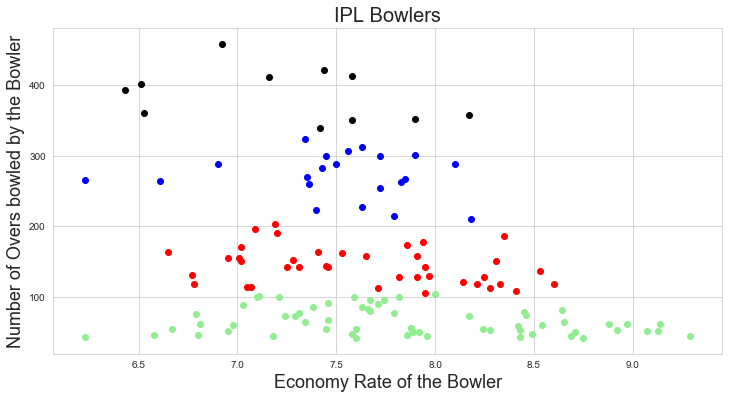

In [130]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(Bowlers[["Econ_Rate", "Over_count"]])
Bowlers["cluster"] = kmeans.labels_

fig = plt.figure(figsize=(12,6))

colors = ["blue", "lightgreen", "black", "red"]

for r in range(1,5):
    clustered_Bowlers = Bowlers[Bowlers["cluster"] == r]
    plt.scatter(clustered_Bowlers["Econ_Rate"], clustered_Bowlers["Over_count"], color=colors[r-1])
    
plt.title("IPL Bowlers", fontsize=20)
plt.xlabel("Economy Rate of the Bowler", fontsize=18)
plt.ylabel("Number of Overs bowled by the Bowler", fontsize=18)
    
plt.show()

#### Merging the Player dataframe and Bowlers dataframe to show player names and cluster ids

In [131]:
Bowlers = Bowlers.rename(columns={"Bowler_names": "Player_Id"})
Bowlers = Bowlers.sort_values(by ='cluster' )
Bowlers.head()

,Player_Id,Runs,Over_count,Econ_Rate,cluster
330,396,7.0,1.000000,7.00,0
219,448,6.0,1.166667,5.14,0
112,158,214.0,30.000000,7.13,0
114,161,301.0,35.500000,8.48,0
217,301,18.0,2.666667,6.75,0


In [133]:
Players_bowlers = players[["Player_Id", "Player_Name","Bowling_Skill","DOB","Country"]]

#### bowling skill of batsman

In [134]:
Bowlers = Bowlers[Bowlers.columns].merge(Players_bowlers, "left")
Bowlers

,Player_Id,Runs,Over_count,Econ_Rate,cluster,Player_Name,Bowling_Skill,DOB,Country
0,396,7.0,1.000000,7.00,0,KS Williamson,Right-arm offbreak,8-Aug-90,New Zealand
1,448,6.0,1.166667,5.14,0,SS Mundhe,Right-arm medium,27-Oct-88,India
2,158,214.0,30.000000,7.13,0,KP Pietersen,Right-arm offbreak,27-Jun-80,South Africa
3,161,301.0,35.500000,8.48,0,RS Bopara,Right-arm medium,4-May-85,England
4,301,18.0,2.666667,6.75,0,S Rana,Right-arm medium-fast,18-Sep-84,India
...,...,...,...,...,...,...,...,...,...
287,333,1019.0,128.833333,7.91,4,P Awana,Right-arm medium,19-Jul-86,India
288,311,941.0,113.666667,8.28,4,HV Patel,Right-arm medium,23-Nov-90,India
289,370,866.0,112.333333,7.71,4,PV Tambe,Legbreak,8-Oct-71,India
290,31,1371.0,190.333333,7.20,4,YK Pathan,Right-arm offbreak,17-Nov-82,India


### Data visualization of Bowling Skill and Cluster assigned to player

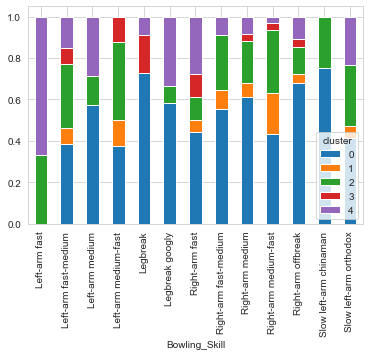

In [135]:
plot_bar(Bowlers, 'Bowling_Skill', 'cluster')
plt.show()

In [136]:
final=pd.concat([Batsmen,Bowlers],sort="True").reset_index(drop=True)
final

,Balls_played,Batting_Hand,Bowling_Skill,Country,DOB,Econ_Rate,Over_count,Player_Id,Player_Name,Runs,Strike_rate,cluster
0,71.0,Left_Hand,NaN,Australia,17-Nov-75,NaN,NaN,182,LA Carseldine,81.0,114.084507,0
1,159.0,Right_Hand,NaN,England,26-May-76,NaN,NaN,241,PD Collingwood,203.0,127.672956,0
2,26.0,Right_Hand,NaN,India,25-Oct-89,NaN,NaN,244,A Mithun,34.0,130.769231,0
3,23.0,Right_Hand,NaN,India,9-Oct-87,NaN,NaN,245,AP Dole,34.0,147.826087,0
4,27.0,Right_Hand,NaN,India,5-Nov-88,NaN,NaN,246,AN Ahmed,36.0,133.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...
511,NaN,NaN,Right-arm medium,India,19-Jul-86,7.91,128.833333,333,P Awana,1019.0,NaN,4
512,NaN,NaN,Right-arm medium,India,23-Nov-90,8.28,113.666667,311,HV Patel,941.0,NaN,4
513,NaN,NaN,Legbreak,India,8-Oct-71,7.71,112.333333,370,PV Tambe,866.0,NaN,4
514,NaN,NaN,Right-arm offbreak,India,17-Nov-82,7.20,190.333333,31,YK Pathan,1371.0,NaN,4
